# Free Fall Program

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background')

In [88]:
y0=[0., 10.] # here we follow the book notation: y[0] is the height, y[1] is the y component of the velocity
a=-9.8 # gravitational acceleration 
time_fall_minus=(-y0[1]-np.sqrt(y0[1]**2-2*a*y0[0]))/a
time_fall_plus=(-y0[1]+np.sqrt(y0[1]**2-2*a*y0[0]))/a
time_fall=max(time_fall_minus,time_fall_plus)

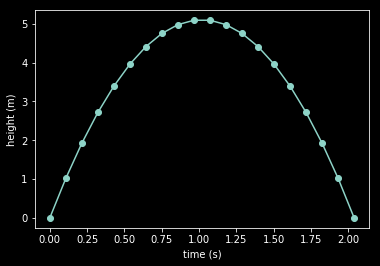

In [89]:
nt=20
times_analytic=np.linspace(0.,time_fall,nt)
heights_analytic=y0[0]+y0[1]*times_analytic+0.5*a*times_analytic**2
plt.plot(times_analytic,heights_analytic,'o-')
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

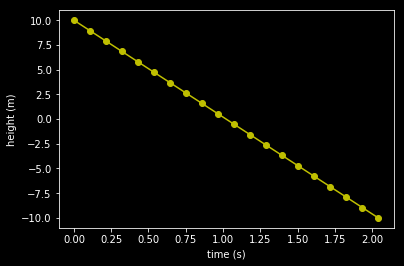

In [91]:
velocity_analytic=y0[1]+a*times_analytic
plt.plot(times_analytic,velocity_analytic,'o-y')
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

In [83]:
def Euler(diffeq,y0,t,h):
    """"""
    dydt=diffeq(y0,t) # get {dy/dt} at t
    return y0 + h*dydt

In [84]:
def freefall(y,t):
    """"""
    dydt=np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = -9.8
    return dydt

In [127]:
y0 = [0., 10.]
dt = 0.02
times_Euler=[0.]
heights_Euler=[y0[0]]
while True:
    y0=Euler(freefall,y0,times_Euler[-1],dt)
    if y0[0] < 0. : break
    heights_Euler.append(y0[0])
    times_Euler.append(times_Euler[-1]+dt)

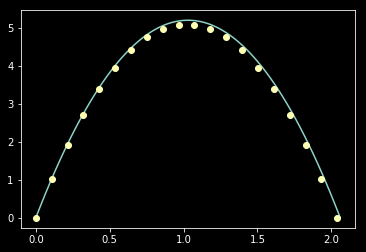

In [128]:
plt.plot(times_Euler,heights_Euler,'-')
plt.plot(times_analytic,heights_analytic,'o ')
plt.plot()
plt.show()

In [114]:
def RK2(diffeq,y0,t,h):
    """"""
    k1=h*diffeq(y0,t)
    k2=h*diffeq(y0+0.5*k1,t+h/2.)
    return y0+k2

In [143]:
y0 = [0., 10.]
dt = 0.02
times_RK2=[0.]
heights_RK2=[y0[0]]
while True:
    y0=RK2(freefall,y0,times_RK2[-1],dt)
    if y0[0] < 0. : break
    times_RK2.append(times_RK2[-1]+dt)
    heights_RK2.append(y0[0])

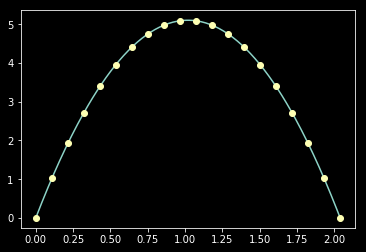

In [142]:
plt.plot(times_RK2,heights_RK2,'-')
plt.plot(times_analytic,heights_analytic,'o ')
plt.plot()
plt.show()